In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.tree import DecisionTreeClassifier, plot_tree

from matplotlib  import rcParams
import warnings

In [2]:
df=pd.read_csv('RBF.csv')

In [3]:
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   
0              6      148             72             35        0  33.6  \
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
X=df.drop("Outcome",axis=1)
y=df["Outcome"]


In [7]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [8]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,y,stratify=y,test_size=0.10,random_state=33)

In [9]:
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train,Y_train)

RandomForestClassifier()

In [10]:
y_pred = classifier.predict(X_test)

In [11]:
print("Accuracy:",accuracy_score(Y_test,y_pred))

Accuracy: 0.8571428571428571


In [12]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score
print("Accuracy-DecisionTree :",accuracy_score(Y_test,Y_pred))


Accuracy-DecisionTree : 0.6883116883116883


In [14]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, Y_train)
y_pred_dt = clf_dt.predict(X_test)

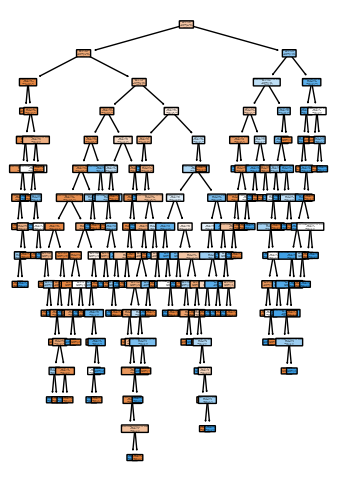

In [17]:
plt.figure(figsize=(4,6))
plot_tree(clf_dt, filled=True, feature_names=X.columns, class_names=['0', '1'], rounded=True)
plt.show()